In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/Tomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Tomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')
df = df.drop(columns=['Director', 'Cast', 'Wiki Page'])
df.head(3)

,Release Year,Title,Origin/Ethnicity,Genre,Plot
0,1901,Kansas Saloon Smashers,American,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,unknown,"The film, just over a minute long, is composed..."


In [17]:
df

,Release Year,Title,Origin/Ethnicity,Genre,Plot
0,1901,Kansas Saloon Smashers,American,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,unknown,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,unknown,Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,unknown,The earliest known adaptation of the classic f...
...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,unknown,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,comedy,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,comedy,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,romantic comedy,The film centres around a young woman named Am...


In [16]:
df['Genre'].iloc[0]

'unknown'

In [3]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r"[.,?!()\/#*&$^\-_:;'<>\[\]\"\\]", "", text)
    text = re.sub(r"(?<!\d)\d(?!\d)", "", text)
    text = text.lower()
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

In [4]:
n = 2000
df_sample = df.head(n)


all_tokens = list(set(chain.from_iterable(df_sample['Plot'].apply(preprocess_text))))
all_tokens.sort()

In [5]:
dict = {word:0 for word in  all_tokens}

sample_entry = preprocess_text(df_sample.iloc[0]['Plot'])
sample_dct = Counter(sample_entry)
for word, count in sample_dct.items():
    dict[word] = count

In [6]:
X = np.zeros((n, len(all_tokens)))


for i, text in enumerate(df_sample['Plot']):
    word_dict = {word: 0 for word in all_tokens}
    sample_entry = preprocess_text(text)
    sample_dct = Counter(sample_entry)
    for word, count in sample_dct.items():
        word_dict[word] += count
    X[i] = list(word_dict.values())

In [179]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
pca = PCA()
pca.fit(X)




PCA()

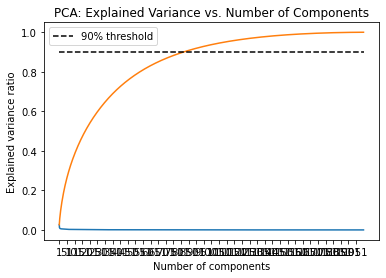

Number of components required to reach 90% explained variance: 817


In [8]:
threshold = 0.9

# Determine how many components are needed to reach the threshold
required_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1

# Plot the accumulated explained variance ratio
fig = plt.figure()
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.plot(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
plt.plot([1, 1+pca.n_components_], [threshold, threshold], "k--", label=f"{threshold:.0%} threshold")
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.xticks(range(1, pca.n_components_+1)[::50])
plt.legend()
plt.show()

### END SOLUTION
print(f"Number of components required to reach {threshold:.0%} explained variance: {required_components}")

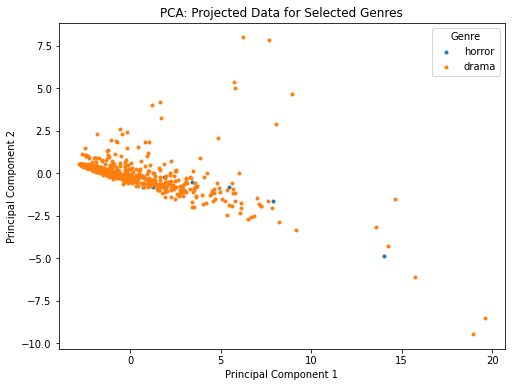

In [13]:

# Pick genres to visualize
genres = ['horror', 'drama']

# Compute PCA projection if not already done
B = pca.transform(X)
# (or skip this if B is already computed)

plt.figure(figsize=(8, 6))

for genre in genres:
    mask = (df_sample['Genre'] == genre)
    plt.scatter(B[mask, 0], B[mask, 1], marker='.', label=genre)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Projected Data for Selected Genres")
plt.legend(title="Genre")
plt.show()

In [172]:
df_sample['Genre'].value_counts()

comedy                        28
unknown                       27
drama                         23
western                        4
adventure                      2
horror                         2
drama, horror                  1
fantasy                        1
documentary drama              1
biographical drama             1
fantasy drama                  1
historical drama               1
silent sports                  1
crime                          1
short fantasy                  1
biographical                   1
short film                     1
short action/crime western     1
short                          1
adventure serial               1
Name: Genre, dtype: int64

In [173]:
len(df_sample)

100

In [14]:
set(df['Origin/Ethnicity'])

{'American',
 'Assamese',
 'Australian',
 'Bangladeshi',
 'Bengali',
 'Bollywood',
 'British',
 'Canadian',
 'Chinese',
 'Egyptian',
 'Filipino',
 'Hong Kong',
 'Japanese',
 'Kannada',
 'Malayalam',
 'Malaysian',
 'Maldivian',
 'Marathi',
 'Punjabi',
 'Russian',
 'South_Korean',
 'Tamil',
 'Telugu',
 'Turkish'}